# AI vs Human Text Classification – NLP Project

In this notebook, we will build a simple **text classification model** that can tell if a given text was written by a **human** or generated by **AI**.  

We will cover:
1. Loading and exploring the dataset.
2. Preprocessing text data.
3. Representing text using **TF-IDF**.
4. Training a **Multinomial Naive Bayes** classifier.
5. Evaluating model performance using **Accuracy**, **F1-score**, and a **confusion matrix**.
6. Creating a **simple web interface** to input text and get predictions in real time.

This project demonstrates **classical NLP techniques** without using neural networks or large language models like BERT.


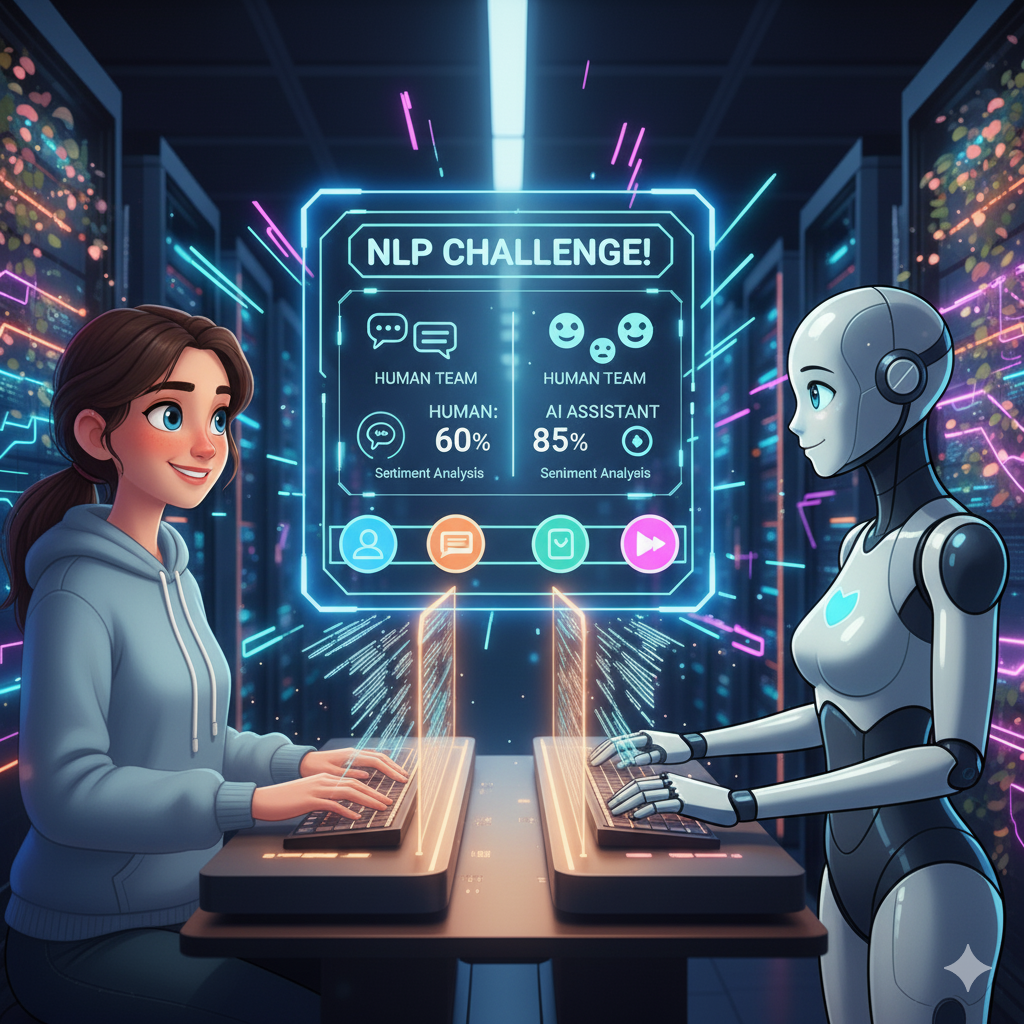

## Step 0: Install required packages

Before using the saved model and vectorizer, we need some Python packages:

- **pyngrok**: to expose a local Flask app to a public URL.
- **flask**: to create a web interface for predictions.
- **joblib**: to save and load trained models efficiently.
- **scikit-learn**: contains TF-IDF vectorizers, classifiers, and metrics.

We can install them using `pip`.


In [11]:
!pip install pyngrok flask joblib scikit-learn


## Step 1: Load previously trained model and TF-IDF vectorizer

If you have already trained a text classification model and a TF-IDF vectorizer, you can **save them** using `joblib`. Later, you can **load them back** without retraining.

Example saved files:
- `model.pkl` → the trained classifier (e.g., MultinomialNB or LogisticRegression)
- `vectorizer.pkl` → the fitted TF-IDF vectorizer

This allows you to **reuse the model** for predictions or deploy it to a web interface.


In [12]:


import joblib

model = joblib.load("/content/model.pkl")
vectorizer = joblib.load("/content/vectorizer.pkl")


## Function: `predict_text`

This function predicts whether a given text is written by a human or generated by AI.

**Inputs:**
- `model`: Trained `MultinomialNB` classifier.
- `vectorizer`: Fitted TF-IDF or CountVectorizer used during training.
- `text`: A string containing the new text to classify.

**Output:**
- Returns `"AI"` if the text is AI-generated.
- Returns `"Human"` if the text is human-written.

**Notes:**
- Automatically transforms the text into numeric features using the same vectorizer as in training.
- Handles the dense array requirement for `MultinomialNB`.
- Outputs a human-readable label.


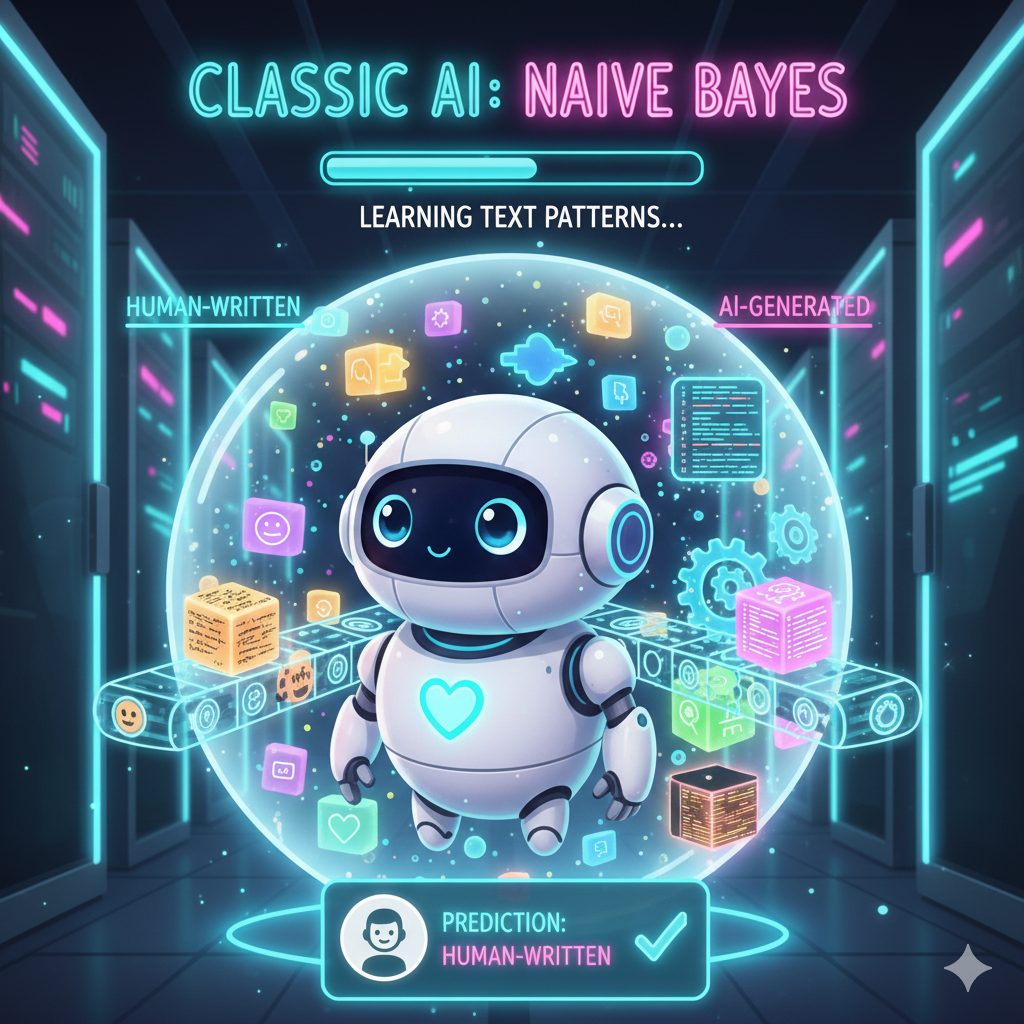

In [13]:
def predict_text(model, vectorizer, text):

    X = vectorizer.transform([text])
    try:
        pred = model.predict(X.toarray())  # Naive Bayes
    except:
        pred = model.predict(X)            # Logistic Regression
    return "AI" if pred[0]==1 else "Human"


## Flask Web App with ngrok

We create a modern web interface for our classifier.  
- Users can type or paste text into a **textarea**.
- Click **Predict** to see the classification result.
- The app is publicly accessible via **ngrok**.


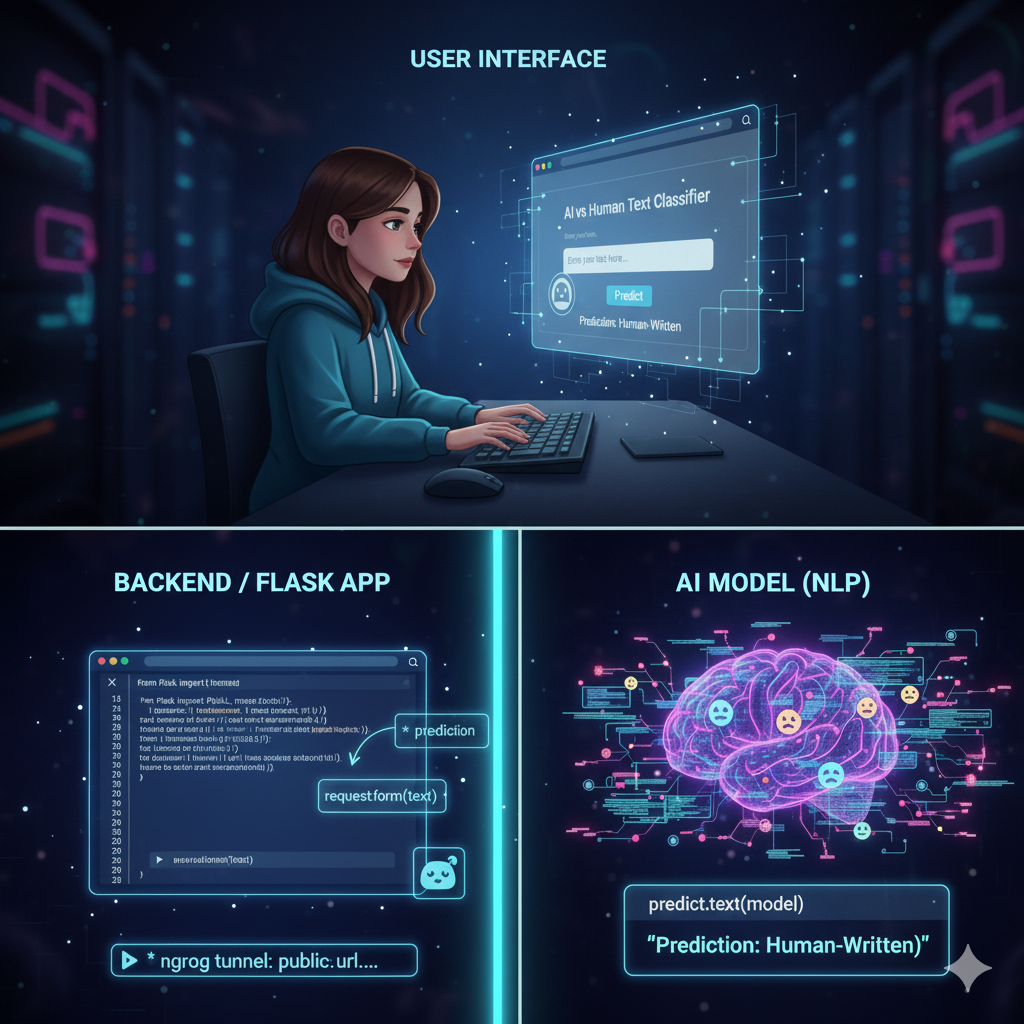

In [15]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok

ngrok.set_auth_token("NGROK_AUTH_TOKEN")

app = Flask(__name__)

HTML_TEMPLATE = """
<!doctype html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>AI vs Human Text Classifier</title>
<style>
    body {
        background-color: #f0f2f5;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        display: flex;
        justify-content: center;
        align-items: center;
        height: 100vh;
        margin: 0;
    }
    .container {
        background-color: #fff;
        padding: 40px;
        border-radius: 12px;
        box-shadow: 0 8px 20px rgba(0,0,0,0.15);
        text-align: center;
        width: 500px;
    }
    h1 {
        color: #333;
        margin-bottom: 20px;
    }
    textarea {
        width: 100%;
        height: 120px;
        padding: 10px;
        border-radius: 8px;
        border: 1px solid #ccc;
        font-size: 16px;
        resize: none;
    }
    input[type="submit"] {
        margin-top: 15px;
        padding: 12px 25px;
        font-size: 16px;
        color: #fff;
        background-color: #007bff;
        border: none;
        border-radius: 8px;
        cursor: pointer;
        transition: background-color 0.3s;
    }
    input[type="submit"]:hover {
        background-color: #0056b3;
    }
    .result {
        margin-top: 25px;
        font-size: 20px;
        font-weight: bold;
        color: #555;
    }
</style>
</head>
<body>
    <div class="container">
        <h1>AI vs Human Classifier</h1>
        <form method="post">
            <textarea name="text" placeholder="Enter your text here...">{{ request.form.text or '' }}</textarea><br>
            <input type="submit" value="Predict">
        </form>
        {% if prediction %}
            <div class="result">Prediction: {{ prediction }}</div>
        {% endif %}
    </div>
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = ""
    if request.method == "POST":
        text = request.form["text"]
        prediction = predict_text(model, vectorizer, text)
    return render_template_string(HTML_TEMPLATE, prediction=prediction)

public_url = ngrok.connect(5000)
print(" * ngrok tunnel:", public_url)

app.run(port=5000)


 * ngrok tunnel: NgrokTunnel: "https://d707e0c32b23.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
